In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#video_data = pd.read_csv('../data/USvideos.csv')
#trending_date,views,likes,dislikes, categories = video_data['trending_date'],video_data['views'],video_data['likes'],video_data['dislikes'],video_data['category_id']
#title = video_data['title']
# ss = StandardScaler()
# le = LabelEncoder()
# enc = OneHotEncoder(sparse=False)
# # preprocessed_data = {}
# # preprocessed_data['key'] = video_data['video_id']
# # preprocessed_data['trending_date'] = (le.fit_transform(trending_date))
# # preprocessed_data['views'] = (ss.fit_transform(np.array(views).reshape(-1,1)))
# # preprocessed_data['likes'] = (ss.fit_transform(np.array(likes).reshape(-1,1)))
# # preprocessed_data['dislikes'] = (ss.fit_transform(np.array(dislikes).reshape(-1,1)))
# # preprocessed_data['title'] = (video_data['title'])
# # preprocessed_data['comments_disabled'] = (le.fit_transform(video_data['comments_disabled']))
# # print(preprocessed_data['views'])
# scaler_columns = ['likes', 'likes to views','dislikes', 'dislikes to views','comment_count', 'comment_count to views']
# scaled_to_views = ['likes', 'dislikes','comment_count']
# for x in scaled_to_views:
#     video_data[x + ' to views'] = video_data[x] / video_data['views']
# OHE_categories = ['comments_disabled' , 'category_id','ratings_disabled']
# df_processed = pd.DataFrame(ss.fit_transform(video_data[scaler_columns]),columns = scaler_columns,index = None)
# OHE_categories = pd.DataFrame(enc.fit_transform(video_data[OHE_categories]),columns = enc.get_feature_names(),index = None)
# semi_processed = pd.concat([df_processed,OHE_categories],axis = 1)
# full_processed = pd.concat([video_data['views'],semi_processed],axis = 1)
#I can now transform my string trending dates into date trending dates
#Seems time is in the form year day month?
#Pandas time dataframe is in year month day. 
#Process: convert the string into datatype class. 
#group by every video id. Order the video id. Get the amount of time each video is on trending for. 
video_data = pd.read_csv('../data/USvideos.csv')

unique_id = video_data['video_id'].unique()
length_list = []
date_list = []
new_df_with_dates_uniques = {}
for x in unique_id:
    length_list.append(len(video_data[(video_data['video_id'] == x)].values))
print(len(length_list))
new_df_with_dates_uniques = {}
unique_vid_df = video_data
first_instance_checker = set()
for index, row in video_data.iterrows():
    if row['video_id'] in first_instance_checker:
        unique_vid_df.drop(index,inplace = True)
    else:
        first_instance_checker.add(row['video_id'])
print(len(unique_vid_df))
unique_vid_df['duration_on_trending'] = length_list
print(len(unique_vid_df))
#print(full_processed.head())
#export_csv = full_processed.to_csv (r'../data/Processed_Data.csv', index = None, header = True)

6351
6351
6351


In [12]:
#print((unique_vid_df['duration_on_trending']))
#print(length_list)
print(np.isnan(unique_vid_df['duration_on_trending']).any())
print(unique_vid_df['duration_on_trending'].describe())


False
count    6351.000000
mean        6.447646
std         4.642806
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        30.000000
Name: duration_on_trending, dtype: float64


In [88]:

#Preprocessing
ss = StandardScaler()
le = LabelEncoder()
enc = OneHotEncoder(sparse=False)
scaler_columns = ['likes', 'likes to views','dislikes', 'dislikes to views','comment_count', 'comment_count to views','views']
scaled_to_views = ['likes', 'dislikes','comment_count']
for x in scaled_to_views:
    unique_vid_df[x + ' to views'] = unique_vid_df[x] / unique_vid_df['views']
OHE_categories = ['comments_disabled' , 'category_id','ratings_disabled']
df_processed = pd.DataFrame(ss.fit_transform(unique_vid_df[scaler_columns]),columns = scaler_columns,index = None)
print(len(df_processed))
OHE_categories = pd.DataFrame(enc.fit_transform(unique_vid_df[OHE_categories]),columns = enc.get_feature_names(),index = None)
print(len(OHE_categories))
semi_processed = pd.concat([df_processed,OHE_categories],axis = 1)
print(len(semi_processed))
semi_processed['duration_on_trending'] = unique_vid_df['duration_on_trending'].values
print(len(semi_processed))
print(semi_processed.head())
print(np.isnan(semi_processed['duration_on_trending'].values).any())
#export_csv = semi_processed.to_csv (r'../data/Processed_Data.csv', index = None, header = True)

6351
6351
6351
6351
      likes  likes to views  dislikes  dislikes to views  comment_count  \
0  0.198163        1.048301  0.127405           0.504367       0.533694   
1  0.539352       -0.002968  0.390696           0.184570       0.382193   
2  0.959605        0.156871  0.323880          -0.010601       0.171461   
3 -0.209245       -0.304906 -0.063026           0.049618      -0.109780   
4  0.840897        0.653695  0.046513          -0.173352       0.606579   

   comment_count to views     views  x0_0.0  x0_1.0  x1_1.0  ...  x1_24.0  \
0                2.261280 -0.005099     1.0     0.0     0.0  ...      0.0   
1               -0.056688  0.860918     1.0     0.0     0.0  ...      1.0   
2               -0.444554  1.261495     1.0     0.0     0.0  ...      0.0   
3                0.087829 -0.215177     1.0     0.0     0.0  ...      1.0   
4                0.391584  0.693433     1.0     0.0     0.0  ...      1.0   

   x1_25.0  x1_26.0  x1_27.0  x1_28.0  x1_29.0  x1_43.0  x2_0.0  x

In [ ]:
# #Things to look at: 
# #print(video_data['video_id'][2],views[2])
# # list_tags = {}
# # for x in video_data['tags']:
# #     split_tags = x.split('|')
# #     for y in split_tags:
# #         list_tags[y] = []
# #print(list_tags)
# import pandas as pd
# import numpy as np
# video_data = pd.read_csv('../data/USvideos.csv')

# list_tags = []
# for x in video_data['tags']:
#     list_tags.append(x.split('|'))
# flatlist = []
# for sublist in list_tags:
#     for item in sublist:
#         flatlist.append(item)

# unique_list = np.unique(np.array(flatlist))
# print(len(flatlist),len(unique_list))
# a = np.zeros(shape=(len(video_data),len(unique_list)),dtype = int)
# tag_dataframe = pd.DataFrame(a,columns=unique_list)
# print(tag_dataframe.head())
# for sublist in list_tags:
#     counter=0
#     for item in sublist:
#         tag_dataframe[item][counter] = 1
        
#     counter+=1

# # # print(list_tags['trump'])

# # The first for loop (for x in video_data['tags']) is definitely necessary. 
# # If you'd like to speed up your code, you should work with numpy arrays. They are orders of magnitude faster to operate than python lists. 
# # For example, once you have your split_tags list of lists, you could collect the unique elements by using np.unique. 
# # Then you could create an array which will contain the one hot encoded version of the tags. 
# # The array will have the dimensions [number of videos, number of unique tags]. Then you need another loop to fill up this array with ones at the appropriate locations.

 

# # I hope this helps!

# # Andras

808183 58123
    Acceptance Speech    Alex Pardee Inspired Bodypaint Tutorial  \
0                    0                                         0   
1                    0                                         0   
2                    0                                         0   
3                    0                                         0   
4                    0                                         0   

    Anwar Jibawi & Alphacat"   Anwar Jibawi & Ric Flair"   Anwar Jibawi"  \
0                          0                           0               0   
1                          0                           0               0   
2                          0                           0               0   
3                          0                           0               0   
4                          0                           0               0   

    Artist"   Best Friend Makeover Challenge with boyinaband  \
0         0                                              

In [ ]:
# #I can use f test and pca at least, and I can do one other plot without too much work. Check out lecture 9 and 10. 

import pandas as pd
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../data/Processed_Data.csv')
y = df['duration_on_trending'].values # the target variable
df.drop(columns=['duration_on_trending'],inplace=True)
#df.drop(columns=['key'],inplace=True)

X = df.values # the feature matrix
feature_names = df.columns # feature names
f_test, p_values = f_regression(X, y)
print(f_test)
print(p_values)
print(feature_names[np.argsort(p_values)[:3]]) # small p value means more important features
print(feature_names[np.argsort(f_test)[:-4:-1]]) # large f score means more important features
#This overwhelming one sidedness of the results is what prompted me to change my approach with how to decide important factors. The idea now was to use, instead of likes dislike and comment count, to use
#the ratio of these things. 
#Now I repeat the above but having removed likes dislikes and comment count and replace it with the ratio of that to views. 

In [44]:
import matplotlib.pyplot as plt

df = pd.read_csv('../data/Processed_Data.csv')
df.drop(columns = ['duration_on_trending'],inplace=True)
df.drop(columns=['likes'],inplace=True)
df.drop(columns=['dislikes'],inplace=True)
df.drop(columns=['comment_count'],inplace=True)
df.drop(columns=['comment_count to views'],inplace=True)

X = df.values # the feature matrix
feature_names = df.columns # feature names
f_test, p_values = f_regression(X, y)

print(feature_names[np.argsort(p_values)][:5]) # small p value means more important features
print(feature_names[np.argsort(f_test)]) # large f score means more important features
#After doing that we find that the main influencers are categories and not just pure number of likes dislikes and comment count. 
category_list = feature_names[np.argsort(p_values)[:5]]


Index(['likes to views', 'views', 'x1_10.0', 'x1_25.0', 'x1_17.0'], dtype='object')
Index(['x1_22.0', 'x1_15.0', 'dislikes to views', 'x1_19.0', 'x1_23.0',
       'x1_27.0', 'x1_28.0', 'x0_0.0', 'x0_1.0', 'x2_0.0', 'x2_1.0', 'x1_29.0',
       'x1_2.0', 'x1_26.0', 'x1_24.0', 'x1_20.0', 'x1_43.0', 'x1_1.0',
       'x1_17.0', 'x1_25.0', 'x1_10.0', 'views', 'likes to views'],
      dtype='object')


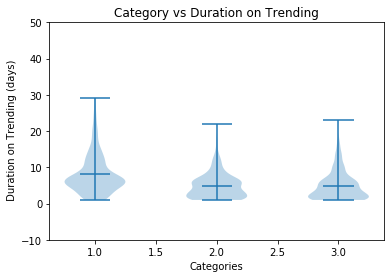

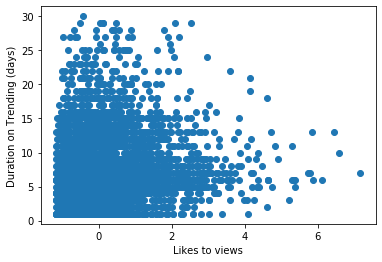

In [69]:
#We can see how some of the categories are influential, lets look at the top 5 categories and create violin graphs from them. 
import matplotlib.pyplot as plt
df = pd.read_csv('../data/Processed_Data.csv')


category_list = ['x1_10.0','x1_25.0','x1_17.0']

list_data = []
for x in category_list:
    data=np.array(df[(df[x] == 1)]['duration_on_trending'])
    list_data.append(data)
plt.ylim((-10, 50))   # set the ylim to bottom, top
plt.violinplot(list_data, range(1,4),showmeans=True,)
plt.title('Category vs Duration on Trending')
plt.ylabel(' Duration on Trending (days)')
plt.xlabel('Categories')
plt.savefig('../figures/violinplot_top3.png',dpi=300)
plt.show()


# plt.violinplot(list_data, range(1,6),showmeans=True,)
# plt.title('Category vs  Duration on Trending')
# plt.ylabel(' Duration on Trending')
# plt.xlabel('Categories')
# plt.savefig('../figures/violinplot.png',dpi=300)
# plt.show()



plt.scatter(df['likes to views'],df['duration_on_trending'])
#plt.scatter(df['views'],df['duration_on_trending'])

plt.ylabel('Duration on Trending (days)')
plt.xlabel('Likes to views')
plt.savefig('../figures/scatter.png',dpi=300)

plt.show()


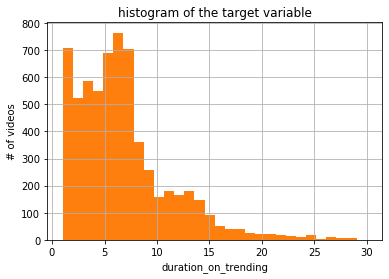

In [53]:
#As we can see from the scatter plot, videos with low dislikes do well and videos with high likes do well. We can also see that some videos with high dislikes can also do well. 

df = pd.read_csv('../data/Processed_Data.csv')
y = df['duration_on_trending']
y.hist(bins=30)
plt.hist(y,bins=30)
plt.xlabel('duration_on_trending')
plt.ylabel('# of videos')
plt.title('histogram of the target variable')
plt.savefig('../figures/histogram.png',dpi=300)

plt.show()
#print(y.describe())
# dz = pd.read_csv('USvideos.csv')
# y = dz['views']
# y.hist(bins=30)
# plt.hist(y,bins=30,log=True,)
# plt.xlabel('views')
# plt.ylabel('# of videos')
# plt.title('histogram of the target variable')
# plt.show()
#print(y.describe())

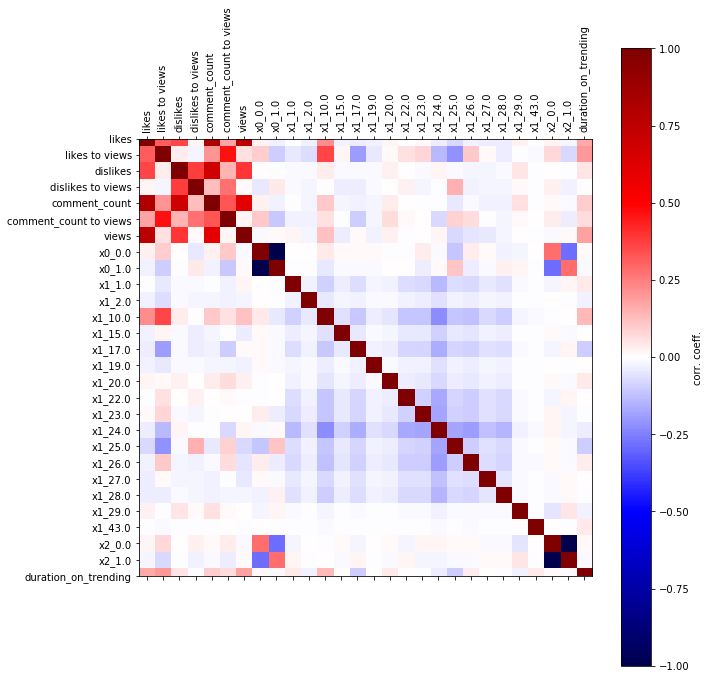

In [55]:
df = pd.read_csv('../data/Processed_Data.csv')

plt.figure(figsize=(10,10))
plt.matshow(df.corr(),vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(df.corr().shape[0]),list(df.corr().columns),rotation=90)
plt.yticks(np.arange(df.corr().shape[0]),list(df.corr().columns))
plt.tight_layout()
plt.savefig('../figures/scattermatrix.png',dpi=300)

plt.show()


In [2]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy  as np

df = pd.read_csv('../data/Processed_Data.csv')
y = df['duration_on_trending'].values
df.drop(columns=['duration_on_trending'],inplace=True)
pca = PCA(n_components=df.shape[1]) 
X_pca = pca.fit_transform(df)
print(np.cumsum(pca.explained_variance_ratio_))
print(sum(np.cumsum(pca.explained_variance_ratio_) < 0.95)+1)

[0.38204387 0.55968445 0.71730248 0.78546613 0.84835764 0.88293923
 0.90872605 0.92193511 0.93328901 0.94355457 0.95274173 0.96100307
 0.9689228  0.97560843 0.9817809  0.98699    0.99085254 0.99382527
 0.99599602 0.99747622 0.99871632 0.9996209  0.9999154  1.
 1.         1.         1.        ]
11


In [3]:
import pandas as pd
import numpy  as np
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
from sklearn.svm import SVR
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv('../data/Processed_Data.csv')
print(df['duration_on_trending'].describe())
y = df['duration_on_trending'].values
X = df.drop(columns = 'duration_on_trending').values

count    6351.000000
mean        6.447646
std         4.642806
min         1.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        30.000000
Name: duration_on_trending, dtype: float64


In [25]:
#svr 
def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)

    reg = SVR()  # the parameter(s) we want to tune
    param_grid = {'C': np.logspace(-5,4,5),'gamma': np.logspace(-5,4,5)}    # prepare gridsearch
    grid = GridSearchCV(reg, param_grid=param_grid,scoring = make_scorer(r2_score,greater_is_better=True),
                        cv=kf, return_train_score = True,iid = True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [26]:
test_scores = []
for error in range(1,11):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,error*19,5)
    results = pd.DataFrame(grid.cv_results_)
#     print('CV MSE:',-np.around(results[results['rank_test_score'] == 1]['mean_test_score'].values[0],2),\
#           '+/-',np.around(results[results['rank_test_score'] == 1]['std_test_score'].values[0],2))
#     print('test MSE:',-np.around(test_score,2))
    print(grid.best_estimator_)
    print("R2 score",grid.best_score_)
    print(grid.best_index_)
    test_scores.append(test_score)
print('test accuracy:',np.mean(test_scores),'+/-',np.std(test_scores))

SVR(C=0.31622776601683794, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.31622776601683794, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2 score 0.06717921086663829
12
SVR(C=56.23413251903491, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.0017782794100389228, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2 score 0.06681720911477855
16
SVR(C=0.31622776601683794, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.31622776601683794, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2 score 0.05901873091181022
12
SVR(C=0.31622776601683794, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.31622776601683794, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
R2 score 0.06806366091909212
12
SVR(C=0.31622776601683794, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.31622776601683794, kernel='rbf', max_iter=-1, shrinking=Tru

In [39]:
from sklearn.ensemble import RandomForestRegressor
#Random forest regression
def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)

    reg = RandomForestRegressor(n_jobs= -1,random_state = 19)
    param_grid = {'min_samples_split': range(2,20,4),'max_depth': range(1,30,5)}    # prepare gridsearch
    grid = GridSearchCV(reg, param_grid=param_grid,scoring = make_scorer(r2_score,greater_is_better=True),
                        cv=kf, return_train_score = True,iid = True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [22]:
test_scores = []
for error in range(1,11):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,error*19,5)
    results = pd.DataFrame(grid.cv_results_)
#     print('CV MSE:',-np.around(results[results['rank_test_score'] == 1]['mean_test_score'].values[0],2),\
#           '+/-',np.around(results[results['rank_test_score'] == 1]['std_test_score'].values[0],2))
#     print('test MSE:',-np.around(test_score,2))
    print(grid.best_estimator_)
    print("R2 score",grid.best_score_)
    print(grid.best_index_)
    test_scores.append(test_score)
print('test accuracy:',np.mean(test_scores),'+/-',np.std(test_scores))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=18,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)
R2 score 0.13533662116371642
9
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=18,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)
R2 score 0.1296759697678398
9
RandomForestRegressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
#Lasso
def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)

    reg = LogisticRegression(penalty='l1', solver='saga', max_iter=100000,random_state = 56,n_jobs = -1)
    param_grid = {'C': np.logspace(-5,4,10)} 
    grid = GridSearchCV(reg, param_grid=param_grid,scoring = make_scorer(r2_score,greater_is_better=True),
                        cv=kf, return_train_score = True,iid = True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [28]:
test_scores = []
for error in range(1,11):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,error*19,5)
    results = pd.DataFrame(grid.cv_results_)
#     print('CV MSE:',-np.around(results[results['rank_test_score'] == 1]['mean_test_score'].values[0],2),\
#           '+/-',np.around(results[results['rank_test_score'] == 1]['std_test_score'].values[0],2))
#     print('test MSE:',-np.around(test_score,2))
    print(grid.best_estimator_)
    print("R2 score",grid.best_score_)
    print(grid.best_index_)
    test_scores.append(test_score)
print('test accuracy:',np.mean(test_scores),'+/-',np.std(test_scores))

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='warn', n_jobs=-1, penalty='l1', random_state=56,
                   solver='saga', tol=0.0001, verbose=0, warm_start=False)
R2 score -0.009580471372035547
2
LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='warn', n_jobs=-1, penalty='l1', random_state=56,
                   solver='saga', tol=0.0001, verbose=0, warm_start=False)
R2 score -0.010471037291284712
0
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='warn', n_jobs=-1, penalty='l1', random_state=56,
                   solver='saga', tol=0.0001, verbose=0, warm_start=False)
R2 score -0.0

In [23]:
from sklearn.ensemble import RandomForestRegressor
#Ridge
def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)

    reg = LogisticRegression(penalty='l2', solver='saga', max_iter=100000,random_state = 56,n_jobs = -1)
    param_grid = {'C': np.logspace(-5,4,10)} 
    grid = GridSearchCV(reg, param_grid=param_grid,scoring = make_scorer(r2_score,greater_is_better=True),
                        cv=kf, return_train_score = True,iid = True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [24]:
test_scores = []
for error in range(1,11):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,error*19,5)
    results = pd.DataFrame(grid.cv_results_)
#     print('CV MSE:',-np.around(results[results['rank_test_score'] == 1]['mean_test_score'].values[0],2),\
#           '+/-',np.around(results[results['rank_test_score'] == 1]['std_test_score'].values[0],2))
#     print('test MSE:',-np.around(test_score,2))
    print(grid.best_estimator_)
    print("R2 score",grid.best_score_)
    print(grid.best_index_)
    test_scores.append(test_score)
print('test accuracy:',np.mean(test_scores),'+/-',np.std(test_scores))

LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='warn', n_jobs=-1, penalty='l2', random_state=56,
                   solver='saga', tol=0.0001, verbose=0, warm_start=False)
R2 score -0.009580471372035547
0
LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='warn', n_jobs=-1, penalty='l2', random_state=56,
                   solver='saga', tol=0.0001, verbose=0, warm_start=False)
R2 score -0.009428773136749679
1
LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='warn', n_jobs=-1, penalty='l2', random_state=56,
                   solver='saga', tol=0.0001, verbose=0, warm_start=False)
R2 score -0.

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)

    reg = LinearRegression()
    param_grid = {} 
    grid = GridSearchCV(reg, param_grid=param_grid,scoring = make_scorer(r2_score,greater_is_better=True),
                        cv=kf, return_train_score = True,iid = True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [34]:
test_scores = []
for error in range(1,11):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,error*19,5)
    results = pd.DataFrame(grid.cv_results_)
#     print('CV MSE:',-np.around(results[results['rank_test_score'] == 1]['mean_test_score'].values[0],2),\
#           '+/-',np.around(results[results['rank_test_score'] == 1]['std_test_score'].values[0],2))
#     print('test MSE:',-np.around(test_score,2))
    print(grid.best_estimator_)
    print("R2 score",grid.best_score_)
    print(grid.best_index_)
    test_scores.append(test_score)
print('test accuracy:',np.mean(test_scores),'+/-',np.std(test_scores))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 score 0.0767050555671703
0
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 score 0.07820375653170088
0
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 score 0.06947073832197039
0
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 score 0.08076639725448856
0
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 score 0.06374940122133418
0
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 score 0.0692973598863788
0
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 score 0.076201565344122
0
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 score 0.07326739207570256
0
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 score 0.07243107139305208
0
Linea

Feature ranking:
1. likes (0.615517)
2. dislikes (0.102793)
3. comment_count (0.102232)
4. views (0.085219)
5. x0_0.0 (0.015559)
6. x0_1.0 (0.013678)
7. x1_1.0 (0.013428)
8. x1_2.0 (0.009351)
9. x1_10.0 (0.009110)
10. x1_15.0 (0.007125)
11. x1_17.0 (0.004874)
12. x1_19.0 (0.004293)
13. x1_20.0 (0.004281)
14. x1_22.0 (0.003984)
15. x1_23.0 (0.003036)
16. x1_24.0 (0.002601)
17. x1_25.0 (0.001008)
18. x1_26.0 (0.000708)
19. x1_27.0 (0.000649)
20. x1_28.0 (0.000388)
21. x1_29.0 (0.000168)
22. x1_43.0 (0.000000)
23. x2_0.0 (0.000000)
24. x2_1.0 (0.000000)


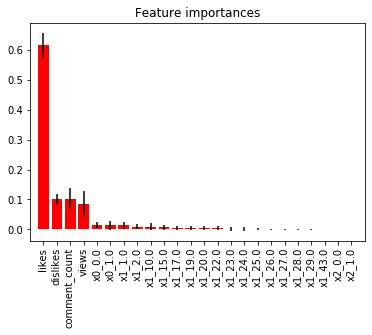

In [9]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('../data/Processed_Data.csv')
y = df['duration_on_trending'].values
X = df.drop(columns = ['duration_on_trending','likes to views','dislikes to views','comment_count to views']).values
columns = df.drop(columns = ['duration_on_trending','likes to views','dislikes to views','comment_count to views']).columns
forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=18,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=19, verbose=0,
                      warm_start=False)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1,columns[f],importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), columns,rotation=90)
plt.xlim([-1, X.shape[1]])
plt.savefig('../figures/Feature_Importance.png',dpi=300)
plt.show()